In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
path_arquivos = 'arquivos'
encoding = 'utf-8'

In [4]:
df_2010 = pd.read_csv(f'{path_arquivos}/microdados_ed_basica_2010.csv', encoding=encoding, sep=';')
df_2011 = pd.read_csv(f'{path_arquivos}/microdados_ed_basica_2011.csv', encoding=encoding, sep=';')
df_2012 = pd.read_csv(f'{path_arquivos}/microdados_ed_basica_2012.csv', encoding=encoding, sep=';')
df_2013 = pd.read_csv(f'{path_arquivos}/microdados_ed_basica_2013.csv', encoding=encoding, sep=';')
df_2014 = pd.read_csv(f'{path_arquivos}/microdados_ed_basica_2014.csv', encoding=encoding, sep=';')
df_2015 = pd.read_csv(f'{path_arquivos}/microdados_ed_basica_2015.csv', encoding=encoding, sep=';')

df_final = pd.concat([df_2010, df_2011, df_2012, df_2013, df_2014, df_2015],
                     axis=0,
                     ignore_index=True)

# filtrando os dados do RJ e apenas colegios que possuem ensino médio

df_rj = df_final[(df_final['SG_UF'] == 'RJ') & (df_final['IN_MED'] == 1)]

dados_infraestrutura = [
    'NU_ANO_CENSO',
    'CO_ENTIDADE',
    'TP_DEPENDENCIA',
    'SG_UF',
    'IN_BIBLIOTECA_SALA_LEITURA',
    'IN_LABORATORIO_CIENCIAS',
    'IN_AUDITORIO',
    'IN_INTERNET',
    'QT_DOC_MED'
]

df_rj = df_rj[dados_infraestrutura]

C:\Users\GustavoValentim\AppData\Local\Temp\ipykernel_14648\2360994105.py:1: DtypeWarning: Columns (20,21,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2010 = pd.read_csv(f'{path_arquivos}/microdados_ed_basica_2010.csv', encoding=encoding, sep=';')
C:\Users\GustavoValentim\AppData\Local\Temp\ipykernel_14648\2360994105.py:2: DtypeWarning: Columns (20,21,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2011 = pd.read_csv(f'{path_arquivos}/microdados_ed_basica_2011.csv', encoding=encoding, sep=';')
C:\Users\GustavoValentim\AppData\Local\Temp\ipykernel_14648\2360994105.py:3: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2012 = pd.read_csv(f'{path_arquivos}/microdados_ed_basica_2012.csv', encoding=encoding, sep=';')
C:\Users\GustavoValentim\AppData\Local\Temp\ipykernel_14648\2360994105.py:4: DtypeWarning: Columns (27) have mixed types. Specify dtype option on

In [5]:
# carregando, filtrando e manipulando dados sobre o Enem por escola

df_enem = pd.read_csv(f'{path_arquivos}/MICRODADOS_ENEM_ESCOLA.csv',
                     encoding=encoding,
                     sep=';')

years_to_include = [2010, 2011, 2012, 2013, 2014, 2015]
colunas_selecionadas = ['CO_ESCOLA_EDUCACENSO', 'NU_ANO', 'SG_UF_ESCOLA',
                       'TP_DEPENDENCIA_ADM_ESCOLA', 'NU_TAXA_PARTICIPACAO', 'NU_TAXA_APROVACAO', 'TP_LOCALIZACAO_ESCOLA', 
                       'NU_MEDIA_CN', 'NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT', 'NU_MEDIA_RED']

df_enem_final = df_enem[
    (df_enem['SG_UF_ESCOLA'] == 'RJ') &
    (df_enem['NU_ANO'].isin(years_to_include))
][colunas_selecionadas].copy()

df_enem_final = df_enem_final.rename(columns={
    'CO_ESCOLA_EDUCACENSO': 'CO_ENTIDADE',
    'NU_ANO': 'NU_ANO_CENSO',
    'SG_UF_ESCOLA': 'SG_UF',
    'TP_DEPENDENCIA_ADM_ESCOLA': 'TP_DEPENDENCIA'
})

C:\Users\GustavoValentim\AppData\Local\Temp\ipykernel_14648\1500348127.py:3: DtypeWarning: Columns (0,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_enem = pd.read_csv(f'{path_arquivos}/MICRODADOS_ENEM_ESCOLA.csv',


In [6]:
notas_competencias = ['NU_MEDIA_CN', 'NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT', 'NU_MEDIA_RED']

In [7]:
correlacao = df_enem_final[notas_competencias].corr()
print(correlacao)

# boa correlação de pearson entre as competencias -> justificativa para unificar as pontuações em uma unica pontuação

              NU_MEDIA_CN  NU_MEDIA_CH  NU_MEDIA_LP  NU_MEDIA_MT  NU_MEDIA_RED
NU_MEDIA_CN      1.000000     0.885867     0.918387     0.915664      0.834201
NU_MEDIA_CH      0.885867     1.000000     0.845764     0.740300      0.784604
NU_MEDIA_LP      0.918387     0.845764     1.000000     0.859763      0.837568
NU_MEDIA_MT      0.915664     0.740300     0.859763     1.000000      0.793376
NU_MEDIA_RED     0.834201     0.784604     0.837568     0.793376      1.000000


In [8]:
scaler = StandardScaler()
notas_normalizadas = scaler.fit_transform(df_enem_final[notas_competencias])

# normalização das notas por competência -> necessário por não possuirem mesmo range de nota

In [9]:
df_enem_final["NOTA_GERAL_ESCOLA"] = notas_normalizadas.mean(axis=1)

# média das competências pós normalização

In [10]:
# Mesclando o dataset do censo com o dataset do enem por escola

df_completo = pd.merge(
    df_rj,
    df_enem_final,
    how='inner',
    left_on=['CO_ENTIDADE', 'NU_ANO_CENSO'],
    right_on=['CO_ENTIDADE', 'NU_ANO_CENSO']
)

In [11]:
df_completo.columns

Index(['NU_ANO_CENSO', 'CO_ENTIDADE', 'TP_DEPENDENCIA_x', 'SG_UF_x',
       'IN_BIBLIOTECA_SALA_LEITURA', 'IN_LABORATORIO_CIENCIAS', 'IN_AUDITORIO',
       'IN_INTERNET', 'QT_DOC_MED', 'SG_UF_y', 'TP_DEPENDENCIA_y',
       'NU_TAXA_PARTICIPACAO', 'NU_TAXA_APROVACAO', 'TP_LOCALIZACAO_ESCOLA',
       'NU_MEDIA_CN', 'NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT',
       'NU_MEDIA_RED', 'NOTA_GERAL_ESCOLA'],
      dtype='object')

In [12]:
df_completo

,NU_ANO_CENSO,CO_ENTIDADE,TP_DEPENDENCIA_x,SG_UF_x,IN_BIBLIOTECA_SALA_LEITURA,IN_LABORATORIO_CIENCIAS,IN_AUDITORIO,IN_INTERNET,QT_DOC_MED,SG_UF_y,TP_DEPENDENCIA_y,NU_TAXA_PARTICIPACAO,NU_TAXA_APROVACAO,TP_LOCALIZACAO_ESCOLA,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NOTA_GERAL_ESCOLA
0,2010,33036594,2,RJ,1,1,0,1,62,RJ,2.0,24.20,65.8,1.0,462.64,520.39,491.42,489.13,588.18,-0.610938
1,2010,33036640,2,RJ,1,1,0,1,99,RJ,2.0,29.60,75.2,1.0,474.04,517.53,509.53,487.42,602.23,-0.466760
2,2010,33036659,4,RJ,1,1,0,1,17,RJ,4.0,92.90,86.2,1.0,572.80,654.54,607.26,649.48,690.38,1.483973
3,2010,33036667,1,RJ,1,1,0,1,81,RJ,1.0,54.50,99.0,1.0,631.65,708.39,620.82,779.94,692.33,2.297554
4,2010,33036675,4,RJ,1,0,0,1,13,RJ,4.0,91.70,91.1,1.0,573.49,644.36,609.27,662.25,761.36,1.662387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,2015,33033994,2,RJ,1,1,1,1,108,RJ,2.0,88.32,89.4,1.0,474.97,582.83,530.97,501.79,608.81,-0.065845
7075,2015,33112959,4,RJ,1,1,1,1,14,RJ,4.0,88.00,97.1,1.0,549.11,594.69,554.61,551.47,631.82,0.544343
7076,2015,33132534,4,RJ,1,0,1,1,30,RJ,4.0,95.65,93.1,1.0,585.85,639.93,585.89,639.50,687.58,1.349667
7077,2015,33147450,4,RJ,1,1,1,1,24,RJ,4.0,91.30,94.1,1.0,545.74,623.60,571.17,596.00,717.14,1.035387


In [13]:
columnsToRemove = [
    'NU_ANO_CENSO',
    'SG_UF_x',
    'CO_ENTIDADE',
    'TP_DEPENDENCIA_y',
    'SG_UF_y',
    'NU_MEDIA_CN', 'NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT', 'NU_MEDIA_RED'
  ]
df_completo = df_completo.drop(columns=columnsToRemove)

df_completo['TP_DEPENDENCIA_x'] = df_completo['TP_DEPENDENCIA_x'].replace({1: 1, 2: 1, 3: 1, 4: 2})

df = df_completo.dropna()

In [14]:
df

,TP_DEPENDENCIA_x,IN_BIBLIOTECA_SALA_LEITURA,IN_LABORATORIO_CIENCIAS,IN_AUDITORIO,IN_INTERNET,QT_DOC_MED,NU_TAXA_PARTICIPACAO,NU_TAXA_APROVACAO,TP_LOCALIZACAO_ESCOLA,NOTA_GERAL_ESCOLA
0,1,1,1,0,1,62,24.20,65.8,1.0,-0.610938
1,1,1,1,0,1,99,29.60,75.2,1.0,-0.466760
2,2,1,1,0,1,17,92.90,86.2,1.0,1.483973
3,1,1,1,0,1,81,54.50,99.0,1.0,2.297554
4,2,1,0,0,1,13,91.70,91.1,1.0,1.662387
...,...,...,...,...,...,...,...,...,...,...
7074,1,1,1,1,1,108,88.32,89.4,1.0,-0.065845
7075,2,1,1,1,1,14,88.00,97.1,1.0,0.544343
7076,2,1,0,1,1,30,95.65,93.1,1.0,1.349667
7077,2,1,1,1,1,24,91.30,94.1,1.0,1.035387


In [15]:
print("Valores faltantes restantes:")
print(df[['NU_TAXA_APROVACAO', 'NOTA_GERAL_ESCOLA']].isna().sum())

Valores faltantes restantes:
NU_TAXA_APROVACAO    0
NOTA_GERAL_ESCOLA    0
dtype: int64


In [16]:
X = df.drop(columns=['NOTA_GERAL_ESCOLA'])
y = df['NOTA_GERAL_ESCOLA']

# Divisão treino-teste (70/30 é comum)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42
)

In [17]:
from sklearn.preprocessing import TargetEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Definir colunas por tipo
cat_cols = ['TP_DEPENDENCIA_x', 'TP_LOCALIZACAO_ESCOLA']
num_cols = ['NU_TAXA_PARTICIPACAO', 'NU_TAXA_APROVACAO', 'QT_DOC_MED']
bin_cols = ['IN_BIBLIOTECA_SALA_LEITURA', 'IN_LABORATORIO_CIENCIAS', 
            'IN_AUDITORIO', 'IN_INTERNET']

# 1. Criar pré-processador com Target Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', TargetEncoder(target_type='continuous'), cat_cols),
        # ('num', StandardScaler(), num_cols)
    ],
    remainder='passthrough'  # Mantém as binárias sem alteração
)

# 2. Criar pipeline completo
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=100,
        max_depth=5,
        min_samples_leaf=10,
        random_state=42
    ))
])

# 3. Treinar o modelo
model.fit(X_train, y_train)

# 4. Fazer previsões e calcular métricas
y_pred = model.predict(X_test)

# 5. Avaliar
print(f"R² Treino: {model.score(X_train, y_train):.3f}")
print(f"R² Teste: {model.score(X_test, y_test):.3f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Erro Médio Absoluto: {mae:.2f} pontos")

R² Treino: 0.685
R² Teste: 0.657
Erro Médio Absoluto: 0.41 pontos


In [18]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import TargetEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Definir colunas por tipo (mantendo suas definições)
cat_cols = ['TP_DEPENDENCIA_x', 'TP_LOCALIZACAO_ESCOLA']
num_cols = ['NU_TAXA_PARTICIPACAO', 'NU_TAXA_APROVACAO', 'QT_DOC_MED']
bin_cols = ['IN_BIBLIOTECA_SALA_LEITURA', 'IN_LABORATORIO_CIENCIAS', 
            'IN_AUDITORIO', 'IN_INTERNET']

# Criar pré-processador comum a todos os modelos
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', TargetEncoder(target_type='continuous'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ],
    remainder='passthrough'
)

# 5. Modelos com hiperparâmetros otimizados
models = {
    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        max_depth=12,
        min_samples_leaf=3,
        max_features=0.8,  # % de features consideradas
        random_state=42,
        n_jobs=-1  # Paralelizar
),
    "XGBoost": XGBRegressor(
        n_estimators=150,  # Reduzir número de árvores
        max_depth=3,       # Reduzir profundidade
        learning_rate=0.03, # Reduzir taxa de aprendizado
        subsample=0.7,     # Usar apenas 70% dos dados por árvore
        colsample_bytree=0.7, # Usar apenas 70% das features
        reg_alpha=0.5,     # Regularização L1
        reg_lambda=1.0,    # Regularização L2
        early_stopping_rounds=10, # Parada antecipada
        random_state=42
    ),
    "Regressão Linear": LinearRegression()
}

# 6. Avaliação com validação cruzada
results = {}
for name, regressor in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])
    
    # Validação cruzada (apenas nos dados de treino)
    cv_results = cross_validate(
        pipeline,
        X_train,
        y_train,
        cv=5,
        scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'],
        return_train_score=True,
        n_jobs=-1  # Paraleliza o processo
    )
    
    # Treino final com todos os dados de treino
    pipeline.fit(X_train, y_train)
    
    # Avaliação no teste
    y_pred_test = pipeline.predict(X_test)
    
    # Armazenar resultados
    results[name] = {
        'CV Treino R²': np.mean(cv_results['train_r2']),
        'CV Validação R²': np.mean(cv_results['test_r2']),
        'CV Validação MAE': -np.mean(cv_results['test_neg_mean_absolute_error']),
        'CV Validação RMSE': -np.mean(cv_results['test_neg_root_mean_squared_error']),
        'Teste R²': r2_score(y_test, y_pred_test),
        'Teste MAE': mean_absolute_error(y_test, y_pred_test),
        'Teste RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'model': pipeline
    }

# 7. Exibir resultados comparativos
print("\n=== RESULTADOS COMPARATIVOS ===")
for name, metrics in results.items():
    print(f"\n*** {name} ***")
    print(f"Validação Cruzada (5 folds):")
    print(f"  R² Médio (Treino): {metrics['CV Treino R²']:.3f}")
    print(f"  R² Médio (Validação): {metrics['CV Validação R²']:.3f}")
    print(f"  MAE Médio (Validação): {metrics['CV Validação MAE']:.2f}")
    print(f"  RMSE Médio (Validação): {metrics['CV Validação RMSE']:.2f}")
    print("\nAvaliação no Conjunto de Teste:")
    print(f"  R²: {metrics['Teste R²']:.3f}")
    print(f"  MAE: {metrics['Teste MAE']:.2f}")
    print(f"  RMSE: {metrics['Teste RMSE']:.2f}")

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\GustavoValentim\IBMEC\25.1\Machine-Learning\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\GustavoValentim\IBMEC\25.1\Machine-Learning\.venv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GustavoValentim\IBMEC\25.1\Machine-Learning\.venv\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "c:\Users\GustavoValentim\IBMEC\25.1\Machine-Learning\.venv\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\GustavoValentim\IBMEC\25.1\Machine-Learning\.venv\Lib\site-packages\xgboost\sklearn.py", line 1247, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\GustavoValentim\IBMEC\25.1\Machine-Learning\.venv\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\GustavoValentim\IBMEC\25.1\Machine-Learning\.venv\Lib\site-packages\xgboost\training.py", line 184, in train
    if cb_container.after_iteration(bst, i, dtrain, evals):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GustavoValentim\IBMEC\25.1\Machine-Learning\.venv\Lib\site-packages\xgboost\callback.py", line 267, in after_iteration
    ret = any(c.after_iteration(model, epoch, self.history) for c in self.callbacks)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GustavoValentim\IBMEC\25.1\Machine-Learning\.venv\Lib\site-packages\xgboost\callback.py", line 267, in <genexpr>
    ret = any(c.after_iteration(model, epoch, self.history) for c in self.callbacks)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GustavoValentim\IBMEC\25.1\Machine-Learning\.venv\Lib\site-packages\xgboost\callback.py", line 463, in after_iteration
    raise ValueError(msg)
ValueError: Must have at least 1 validation dataset for early stopping.


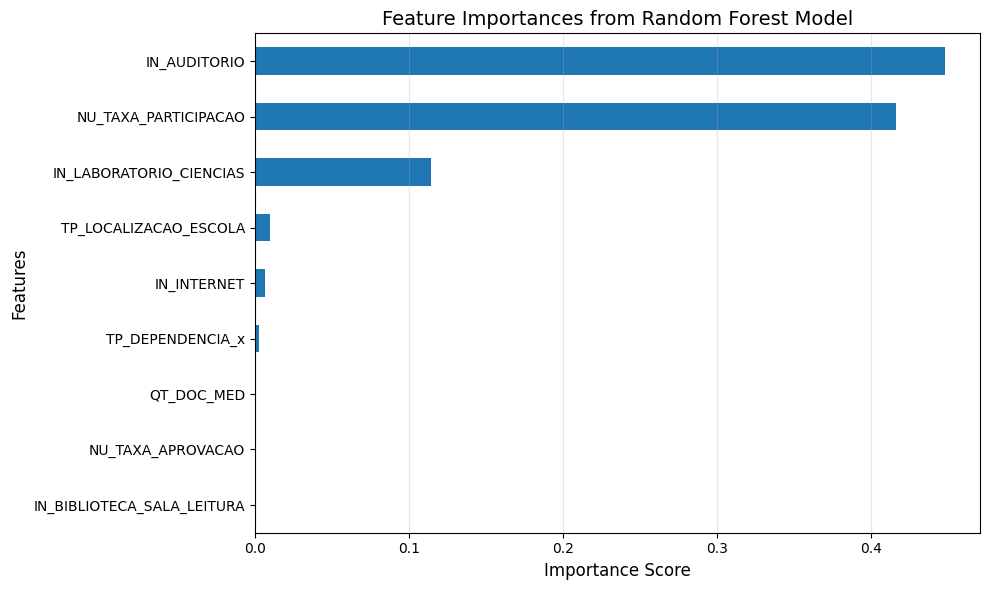

In [ ]:
# 1. Access the trained components from the fitted pipeline
preprocessor = model.named_steps['preprocessor']
rf_model = model.named_steps['regressor']

# 2. Get feature names - no need to refit the preprocessor!
# For ColumnTransformer with TargetEncoder and StandardScaler:
feature_names = (
    num_cols +  # Numeric features (StandardScaler preserves names)
    cat_cols +  # Categorical features (TargetEncoder preserves names)
    bin_cols    # Binary features (passed through)
)

# 3. Get importances from the RandomForest model
importances = rf_model.feature_importances_

# 4. Create and plot the importance series
importance_series = pd.Series(importances, index=feature_names).sort_values()

plt.figure(figsize=(10, 6))
importance_series.plot(kind='barh')
plt.title('Feature Importances from Random Forest Model', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [25]:
df_novo = df.drop(columns=['IN_INTERNET', 'TP_LOCALIZACAO_ESCOLA'])

In [26]:
from pycaret.regression import *

train, test = train_test_split(df_novo, test_size=0.3, random_state=42)

s = setup(train, target='NOTA_GERAL_ESCOLA', session_id=123)

,Description,Value
0,Session id,123
1,Target,NOTA_GERAL_ESCOLA
2,Target type,Regression
3,Original data shape,"(4720, 8)"
4,Transformed data shape,"(4720, 8)"
5,Transformed train set shape,"(3304, 8)"
6,Transformed test set shape,"(1416, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [27]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4039,0.2870,0.5352,0.6844,0.2667,1.8693,0.0290
lightgbm,Light Gradient Boosting Machine,0.4102,0.2986,0.5461,0.6708,0.2697,2.1195,0.1350
rf,Random Forest Regressor,0.4204,0.3184,0.5638,0.6493,0.2759,2.0684,0.0710
et,Extra Trees Regressor,0.4305,0.3342,0.5775,0.6325,0.2790,2.1821,0.0430
xgboost,Extreme Gradient Boosting,0.4378,0.3382,0.5809,0.6277,0.2821,2.1830,0.0190
ada,AdaBoost Regressor,0.4587,0.3431,0.5853,0.6225,0.2740,2.2854,0.0170
lar,Least Angle Regression,0.5063,0.4108,0.6400,0.5498,0.3039,2.1038,0.2290
br,Bayesian Ridge,0.5064,0.4108,0.6400,0.5498,0.3042,2.0968,0.0050
ridge,Ridge Regression,0.5064,0.4108,0.6400,0.5498,0.3040,2.1006,0.0090
lr,Linear Regression,0.5064,0.4108,0.6400,0.5498,0.3039,2.1026,0.0350


c:\Users\GustavoValentim\IBMEC\25.1\Machine-Learning\.venv\Lib\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])


In [29]:
predictions = predict_model(best_model, data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.4126,0.2929,0.5412,0.6555,0.2698,1.7403


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3748,0.2640,0.5138,0.6647,0.2563,1.7990
1,0.3975,0.2766,0.5259,0.6834,0.2612,0.9906
2,0.4093,0.3140,0.5604,0.6637,0.2666,1.4013
3,0.3898,0.2755,0.5248,0.7137,0.2725,1.2562
4,0.3774,0.2402,0.4901,0.7168,0.2591,1.9351
5,0.4205,0.3005,0.5481,0.6403,0.2636,1.3360
6,0.4242,0.2950,0.5432,0.6783,0.2772,4.1290
7,0.4379,0.3304,0.5748,0.7171,0.2843,1.7455
8,0.4024,0.2760,0.5254,0.6772,0.2690,1.9542


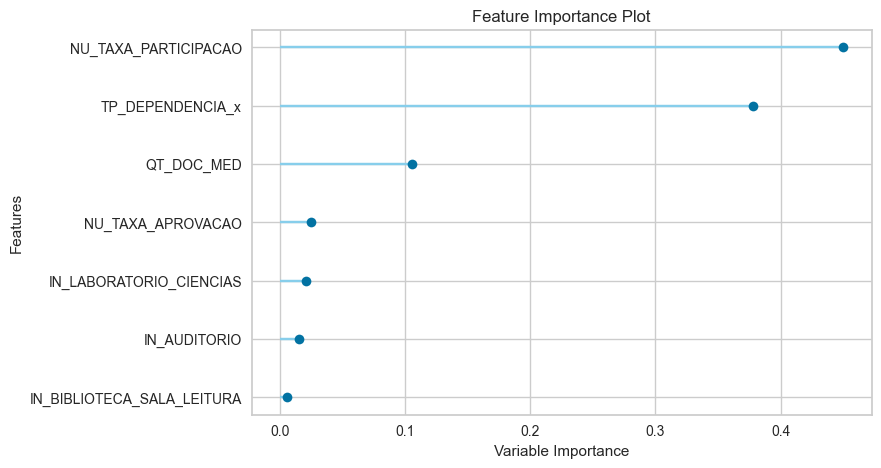

In [30]:
# Criar o modelo (GBR no seu caso)
model = create_model('gbr')

# Plotar feature importance
plot_model(model, plot='feature')